In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Part 1

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sales_data_1.csv')
df.head()


,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


 1. What is their overall gross margin for their business?

In [ ]:
df['Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
gross= int(df['Profit'].sum())
print("Overall Gross Margin: ",gross)

Overall Gross Margin:  31482


2. Which vendor is the most profitable?

In [ ]:
vendor_profit = df.groupby('Firm bought from')['Profit'].sum()
print("Most Profitable Vendor: ",vendor_profit.idxmax())

Most Profitable Vendor:  Vendor4


3. Which customer is the least profitable?

In [ ]:
customer_profit = df.groupby('Customer')['Profit'].sum()
print("Least Profitable Customer: ",customer_profit.idxmin())


Least Profitable Customer:  Customer3


4. Which day of the week was most profitable for them?


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
day_profit = df.groupby('Day_of_Week')['Profit'].sum()
print("Most Profitable Day pf the Week: ",day_profit.idxmax())

Most Profitable Day pf the Week:  Monday


5. Which day of the week was the least profitable for them?


In [ ]:
print("Least Profitable Day of the Week: ",day_profit.idxmin())

Least Profitable Day of the Week:  Sunday


### Part 2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sales_data_2.csv")
df.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [ ]:
df['Profit'] = (df['Selling price']*df["Quantity bought"] - df['Buying price'] * df['Quantity sold'])
df.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,2321.96
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,6424.96
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,401.21
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,3636.79
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01


6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
profit_per_day=df.groupby('Date')['Profit'].sum()

Average_profit = []
for i in range(2,len(profit_per_day)):
  Average_profit.append((profit_per_day[i-2]+profit_per_day[i-1]+profit_per_day[i])/3)

Average_profit



[22281.353333333333, 20549.64, 20667.079999999998, 21072.98, 24070.92]

7. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

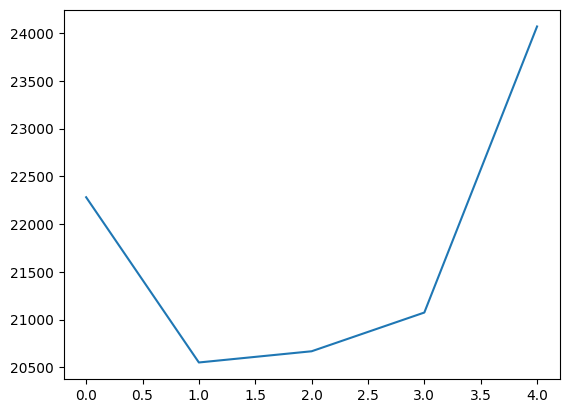

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Average_profit)

Initially the trend falls down in the beginning of the week then slowly there is an upward movement before taking a sharp surge on the profit during the end of the week.

8. Can you optimize the sales process to ensure gross margin is maximized?
    1. Would you fire any vendor?
    2. Would you let go of any customer?

In [ ]:
vendor_margin = df.groupby('Firm bought from')['Profit'].sum()
least_profitable_vendor = vendor_margin.idxmin()
print("Least Profitable Vendor: ",least_profitable_vendor," amd the profit is: ",vendor_margin.min())
print("Contribution: ",vendor_margin.min()*100/df["Profit"].sum(),"%")


customer_margin = df.groupby('Customer')['Profit'].sum()
least_profitable_customer = customer_margin.idxmin()
print("\nLeast Profitable Customer: ",least_profitable_customer," and the profit is: ",customer_margin.min())
print("Contribution: ",customer_margin.min()*100/df["Profit"].sum(),"%")

Least Profitable Vendor:  Vendor6  amd the profit is:  3603.98
Contribution:  2.308066166040665 %

Least Profitable Customer:  Customer9  and the profit is:  6462.549999999999
Contribution:  4.138755764833905 %


9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices?

In [ ]:
buying_percentiles = df['Buying price'].quantile([0.25, 0.5, 0.75])
selling_percentiles = df['Selling price'].quantile([0.25, 0.5, 0.75])
print("Buying Price Percentiles:")
print(buying_percentiles)
print("Selling Price Percentiles:")
print(selling_percentiles)

Buying Price Percentiles:
0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64
Selling Price Percentiles:
0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64


10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [ ]:
below_25th_percentile = df[df['Selling price'] < selling_percentiles[0.25]]
above_75th_percentile = df[df['Selling price'] > selling_percentiles[0.75]]
print("Number of times Sapota's prices fall below 25th percentile:", len(below_25th_percentile))
print("Number of times Sapota's prices go above 75th percentile:", len(above_75th_percentile))


Number of times Sapota's prices fall below 25th percentile: 18
Number of times Sapota's prices go above 75th percentile: 18


11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin?


In [ ]:
vendor4_df = df[df['Firm bought from'] == 'Vendor4'].sum()
vendor4_margin = vendor4_df["Profit"].sum()
print(f"Impact of Vendor 4 on optimal gross margin: ",(vendor4_margin*100/df["Profit"].sum()),"%")


Impact of Vendor 4 on optimal gross margin:  15.02937261046742 %


<ipython-input-131-4145516497c8>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vendor4_df = df[df['Firm bought from'] == 'Vendor4'].sum()


12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?1

In [ ]:
vendor_margin = df.groupby('Firm bought from')['Profit'].sum()
max_margin_vendor = vendor_margin.idxmax()
max_margin = df[df['Firm bought from']==max_margin_vendor]["Profit"].max()
print(f"Vendor for strategic tie-up: ",max_margin_vendor)
print(f"Theoretical max margin from that vendor: ",max_margin)

Vendor for strategic tie-up:  Vendor7
Theoretical max margin from that vendor:  9044.73


13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

In [ ]:
df['Price_change'] = df['Selling price'] - df['Buying price']
df['Quantity_change'] = df['Quantity sold'] / df['Quantity bought']


df['Price_elasticity'] = df['Quantity_change'] / df['Price_change']
average_elasticity = df['Price_elasticity'].mean()

print("Average Price Elasticity: ",average_elasticity)

Average Price Elasticity:  0.05441563316398288
